In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot
! pip install --upgrade bottleneck



In [2]:
df = pd.read_csv("gurgaon_properties_missing_value_imputation.csv")

In [27]:
df.head(5)

,property_type,society,sector,price,Price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
0,flat,tulip ivory,sector 70,5.00,10417.0,6.0,7.0,3+,0.0,Relatively New,5333.00,0,1,1,0,0,0,119
1,flat,signature global the millennia,sector 37d,0.60,9231.0,2.0,2.0,3,7.0,New Property,625.00,0,0,0,0,0,0,35
2,flat,bestech altura,sector 79,1.90,9000.0,3.0,4.0,2,11.0,New Property,2389.00,0,0,1,0,0,0,49
3,flat,conscient elevate,sector 59,6.75,19882.0,4.0,4.0,2,10.0,New Property,2567.00,0,0,1,0,0,0,31
4,flat,vatika city,sector 49,1.98,9074.0,3.0,4.0,3,9.0,Moderately Old,1750.75,0,0,1,0,0,1,101


In [4]:
latlong = pd.read_csv("latlong.csv")

In [5]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [6]:
 latlong["latitude"] = latlong["coordinates"].str.split(",").str[0].str.split("°").str[0].astype("float")

In [7]:
latlong["longitute"] = latlong["coordinates"].str.split(",").str[1].str.split("°").str[0].astype("float")

In [8]:
latlong[latlong["sector"]== "sector 37d"]

,sector,coordinates,latitude,longitute
42,sector 37d,"28.4478° N, 76.9703° E",28.4478,76.9703


In [9]:
new_df =df.merge(latlong, on = "sector")

In [10]:
df["sector"].value_counts()

sector
sohna road    152
sector 85     108
sector 102    106
sector 92     100
sector 69      91
             ... 
sector 73       3
sector 17b      3
sector 88b      3
sector 27       2
sector 37       1
Name: count, Length: 114, dtype: int64

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3271 non-null   object 
 1   society          3271 non-null   object 
 2   sector           3271 non-null   object 
 3   price            3271 non-null   float64
 4   Price_per_sqft   3271 non-null   float64
 5   bedRoom          3271 non-null   float64
 6   bathroom         3271 non-null   float64
 7   balcony          3271 non-null   object 
 8   floorNum         3271 non-null   float64
 9   agePossession    3271 non-null   object 
 10  built_up_area    3271 non-null   float64
 11  store room       3271 non-null   int64  
 12  study room       3271 non-null   int64  
 13  servant room     3271 non-null   int64  
 14  pooja room       3271 non-null   int64  
 15  others           3271 non-null   int64  
 16  furnishing_type  3271 non-null   int64  
 17  luxury_score  

In [12]:
group_df = new_df.groupby("sector")[["price", "Price_per_sqft", "built_up_area", "latitude", "longitute"]].mean()

In [13]:
group_df

,price,Price_per_sqft,built_up_area,latitude,longitute
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 102,1.694245,10632.528302,1548.792453,28.4750,76.9715
sector 103,1.495000,7445.785714,1865.428571,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.944100,5956.970000,1577.261800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326
sector 95,0.480545,5602.509091,995.981818,28.4172,76.9081


In [ ]:
pip install plotly


In [57]:
import plotly.express as px

fig = px.scatter_mapbox(
    group_df,
    lat='latitude',
    lon='longitute',  
    color='Price_per_sqft',
    size='built_up_area',
    color_continuous_scale=px.colors.cyclical.IceFire,  
    text=group_df.index, zoom = 11)  

fig.update_layout(mapbox_style="carto-positron")
fig.show()


In [16]:
new_df.to_csv("data-vizl.csv" , index = False)

In [24]:
df1 = pd.read_csv("gurgaon_cleaned.csv")

In [26]:
df1.head(5)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,tulip ivory,sector 70,5.00,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6.0,7.0,3+,"study room,servant room",0.0,NaN,1 to 5 Year Old,"['Reach 3 Roads Shopping Mall', 'Southern Peri...",[],"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
1,flat,signature global the millennia,sector 37d,0.60,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2.0,2.0,3,not_available,7.0,NaN,0 to 1 Year Old,"['Jharsha Chowk', 'Hero Honda Chowk', 'Rajiv C...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian..."
2,flat,bestech altura,sector 79,1.90,9000.0,2111.0,Carpet area: 2150 (199.74 sq.m.),3.0,4.0,2,servant room,11.0,NaN,0 to 1 Year Old,"['Sapphire 83 Mall', 'NH -8', 'Golf Course Ext...",[],"['Feng Shui / Vaastu Compliant', 'Security / F..."
3,flat,conscient elevate,sector 59,6.75,19882.0,3395.0,Super Built up area 3395(315.41 sq.m.)Carpet a...,4.0,4.0,2,servant room,10.0,NaN,Within 3 months,"['Rapid Metro Station Sector 55', 'Paras Trini...",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s..."
4,flat,vatika city,sector 49,1.98,9074.0,2182.0,Super Built up area 2182(202.71 sq.m.)Built Up...,3.0,4.0,3,servant room,9.0,South-East,5 to 10 Year Old,"['BOB ATM', 'PNB ATM', 'HDFC bank ATM', 'YES b...","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Power Back-up', 'Fe..."


In [29]:
word_cloud_df = df1[["sector", "features"]]

In [30]:
word_cloud_df

,sector,features
0,sector 70,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
1,sector 37d,"['Power Back-up', 'Feng Shui / Vaastu Complian..."
2,sector 79,"['Feng Shui / Vaastu Compliant', 'Security / F..."
3,sector 59,"['Power Back-up', 'Intercom Facility', 'Lift(s..."
4,sector 49,"['Security / Fire Alarm', 'Power Back-up', 'Fe..."
...,...,...
3783,sector 77,"['Centrally Air Conditioned', 'Water purifier'..."
3784,sector 36a,"['Feng Shui / Vaastu Compliant', 'Security / F..."
3785,sector 90,['Maintenance Staff']
3786,sector 65,"['Water purifier', 'Security / Fire Alarm', 'F..."


In [40]:

import ast 
main = []
for item in word_cloud_df["features"].dropna().apply(ast.literal_eval):
    main.extend(item)

In [41]:
main

['Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Water purifier',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Recently Renovated',
 'Piped-gas',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Park',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Power Back-up',
 'Intercom Facility',
 'Lift(s)',
 'Swimming Pool',
 'Park',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Intercom Fa

In [42]:
feature_text= " ".join(main)

In [43]:
from wordcloud import WordCloud

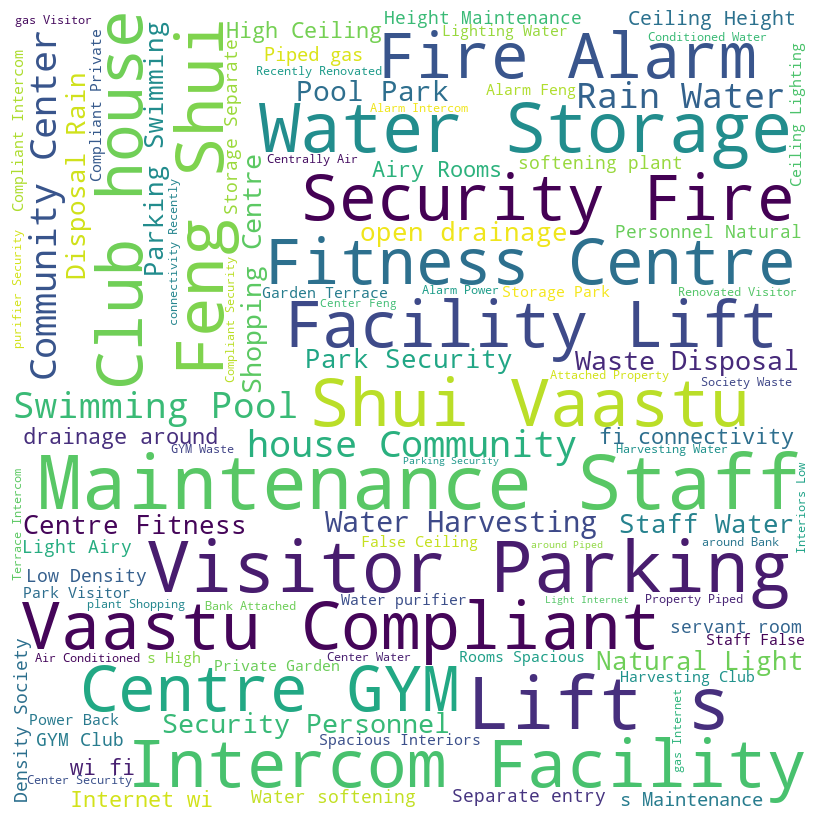

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(feature_text)
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [45]:
import pickle 

In [49]:
pickle.dump(feature_text,open("feature_text.pkl", "wb"))

In [50]:
df.head(2)

,property_type,society,sector,price,Price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
0,flat,tulip ivory,sector 70,5.0,10417.0,6.0,7.0,3+,0.0,Relatively New,5333.0,0,1,1,0,0,0,119
1,flat,signature global the millennia,sector 37d,0.6,9231.0,2.0,2.0,3,7.0,New Property,625.0,0,0,0,0,0,0,35


In [51]:
fig =  px.scatter(df, x = "built_up_area", y = "price", color = "bedRoom", title = "Area vs Price")

In [52]:
fig

In [56]:
fig = px.pie(df, names = "bedRoom", title = "ROOMS DISTRIBUTION")
fig

In [59]:
temp_df = df[df["bedRoom"]<=4]
fig = px.box(temp_df, x= "bedRoom", y = "price", title = "bedroom price range")
fig


C:\Users\guriv\AppData\Local\Temp\ipykernel_20428\1640273401.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\guriv\AppData\Local\Temp\ipykernel_20428\1640273401.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updat

<Axes: xlabel='price', ylabel='Density'>

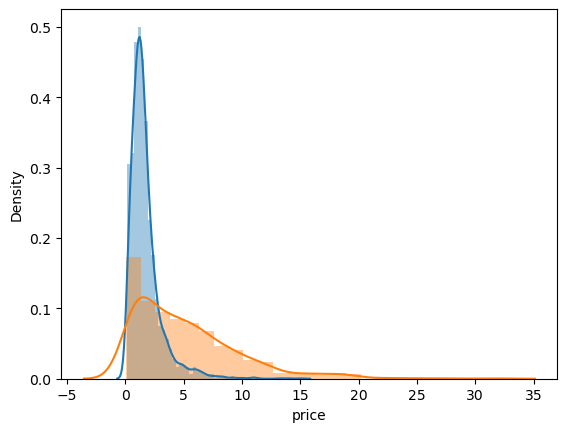

In [60]:
sns.distplot(df[df["property_type"]=="flat"]["price"])
sns.distplot(df[df["property_type"]=="house"]["price"])